In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("ExportAr41_1_part1.csv", index_col=False)
df.head()

,PID,ParentTrackID,energydeposition,kineticenergy,time,x,y,z,eventnumber,tracknumber,creatorprocess,Unnamed: 11
0,2112,0,0.000000,1.000210,0.000000,-1915.687389,312.875503,-154.442884,104,1,primaryParticle,NaN
1,2112,0,0.000000,1.000210,0.000000,-1915.687389,312.875503,-154.442884,104,1,NaN,NaN
2,2112,0,0.000436,0.999774,19.187022,-1915.687458,312.875948,-419.638045,104,1,hadElastic,NaN
3,2112,0,0.002946,0.504805,374.053354,-1448.906453,-635.845649,-475.658941,104,1,hadElastic,NaN
4,2112,0,0.005058,0.455536,481.348019,-859.883954,-1209.798348,-486.843185,104,1,hadElastic,NaN


In [5]:
first_gammas = df[df.PID==22].groupby(["eventnumber", "tracknumber"]).first()

In [7]:
energy = first_gammas.groupby("eventnumber").kineticenergy.sum()

In [8]:
import matplotlib.pyplot as plt

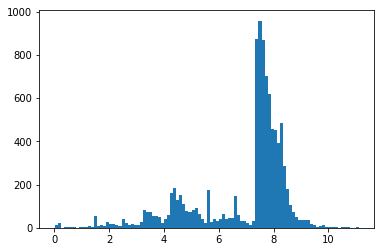

In [10]:
plt.hist(energy, bins=100)
plt.show()

In [11]:
energy.describe()

count    9660.000000
mean        6.898300
std         1.743328
min         0.002471
25%         6.135524
50%         7.567170
75%         7.960853
max        11.111031
Name: kineticenergy, dtype: float64

In [12]:
gammas_df = df[df.PID==22]

In [16]:
gammas_df.loc["r"] = (gammas_df["x"]**2 + gammas_df["y"]**2)**.5

/home/luigi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
outer_gammas = gammas_df[(gammas_df.r>=290) & (gammas_df.r<=300)]
inner_gammas = gammas_df[(gammas_df.r>=170) & (gammas_df.r<=180)]

In [25]:
fiber_gammas = pd.concat([outer_gammas, inner_gammas])
fiber_gammas

,PID,ParentTrackID,energydeposition,kineticenergy,time,x,y,z,eventnumber,tracknumber,creatorprocess,Unnamed: 11,r
6777,22.0,1.0,0.000000,0.455116,5.003601e+01,124.582305,-267.684105,-253.489770,1186.0,5.0,neutronInelastic,NaN,295.255027
8669,22.0,23.0,0.000015,0.229767,4.134190e+11,-184.179017,232.154103,-990.379568,1791.0,27.0,compt,NaN,296.340071
8714,22.0,30.0,0.000000,0.004978,4.134190e+11,-183.680181,232.181805,-990.762036,1791.0,36.0,eBrem,NaN,296.052021
8715,22.0,30.0,0.000015,0.000000,4.134190e+11,-183.680674,232.186040,-990.768963,1791.0,36.0,phot,NaN,296.055648
8716,22.0,36.0,0.000000,0.003163,4.134190e+11,-183.680674,232.186040,-990.768963,1791.0,38.0,phot,NaN,296.055648
8717,22.0,36.0,0.000247,0.000000,4.134190e+11,-183.655693,232.212719,-990.754952,1791.0,38.0,phot,NaN,296.061075
8757,22.0,1.0,0.000249,0.102571,6.094619e+02,-226.251760,181.905399,-1104.347278,1791.0,21.0,compt,NaN,290.309202
22285,22.0,1.0,0.000249,0.094655,2.831179e+03,6.237101,-295.262134,103.287844,5325.0,27.0,compt,NaN,295.328003
22286,22.0,1.0,0.003178,0.000000,2.831193e+03,7.927737,-292.514926,106.145242,5325.0,27.0,phot,NaN,292.622335
24479,22.0,1.0,0.000000,0.562900,1.196876e+02,-295.391552,-2.093870,-233.568399,6153.0,11.0,neutronInelastic,NaN,295.398973


In [27]:
first_fiber_gammas = fiber_gammas.sort_values("time").groupby(["eventnumber", "tracknumber"]).first()

In [28]:
energy_on_fibers = first_fiber_gammas.groupby("eventnumber").kineticenergy.sum()

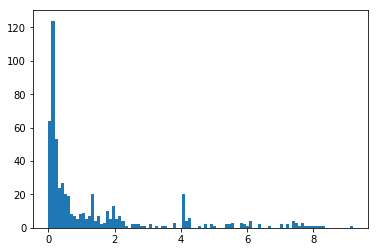

count    556.000000
mean       1.357790
std        1.974016
min        0.000000
25%        0.144505
50%        0.397798
75%        1.768511
max        9.191641
Name: kineticenergy, dtype: float64

In [30]:
plt.hist(energy_on_fibers, bins=100)
plt.show()
energy_on_fibers.describe()

In [33]:
len(fiber_gammas) / len(gammas_df)

0.003759673265097895